In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
plt.rcParams['text.usetex'] = True
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
#plt.rcParams['legend.frameon'] = False

In [ ]:
class classifier():
    def __init__(self, bins, bins_edge, data, BT):
        self.edges = [np.linspace(-bins_edge, bins_edge, bins+1), np.linspace(-bins_edge,bins_edge,bins+1)]
        data_binned = np.histogramdd(data, bins=self.edges)[0]
        BT_binned = np.histogramdd(BT, bins=self.edges)[0]
        with np.errstate(divide='ignore', invalid='ignore'):
            eps = 1e-20
            self.scores = (data_binned + eps) / len(data) / (BT_binned + eps) * len(BT)
        #self.scores = self.scores/(1+self.scores)
        #self.scores[(data_binned==0) & (BT_binned==0)] = 1
        #self.scores[(data_binned==0) & (BT_binned!=0)] = 0
        #self.scores[(BT_binned==0) & (data_binned!=0)] = 10000
        #print(sum((data_binned==0)), sum((BT_binned==0)))
        
    def find_bins(self, data):
        # Find the bin index for x and y
        x_bin = np.searchsorted(self.edges[0], data[:,0], side='right') - 1
        y_bin = np.searchsorted(self.edges[1], data[:,1], side='right') - 1

        #x_bin[(x_bin<0) | (x_bin>=len(self.edges[0])-1)]
        #x_bin[(y_bin<0) | (y_bin>=len(self.edges[1])-1)]

        return x_bin, y_bin

    def predict(self, data):
        locs = self.find_bins(data)
        scores = self.scores[locs[0], locs[1]]
        scores[locs[0]==-1]=-1
        scores[locs[1]==-1]=-1
        print(sum(scores==-1))
        return scores
    
class classifier_inf_statsBT():
    def __init__(self, bins, bins_edge, data):
        self.edges = [np.linspace(-bins_edge, bins_edge, bins+1), np.linspace(-bins_edge,bins_edge,bins+1)]
        data_binned = np.histogramdd(data, bins=self.edges)[0]
        BT_binned = len(data)/bins/bins
        with np.errstate(divide='ignore', invalid='ignore'):
            eps = 1e-20
            self.scores = (data_binned + eps) / len(data) / (BT_binned + eps) * len(data)

    def find_bins(self, data):
        # Find the bin index for x and y
        x_bin = np.searchsorted(self.edges[0], data[:,0], side='right') - 1
        y_bin = np.searchsorted(self.edges[1], data[:,1], side='right') - 1

        return x_bin, y_bin

    def predict(self, data):
        locs = self.find_bins(data)
        scores = self.scores[locs[0], locs[1]]
        scores[locs[0]==-1]=-1
        scores[locs[1]==-1]=-1
        #print(sum(scores==-1))
        return scores

In [ ]:
bkg = stats.uniform(loc=-10, scale=20)

N_bkg = 100000

def oned_sample(N, rv):
    x = rv.rvs(N).reshape((N,1))
    y = rv.rvs(N).reshape((N,1))
    return np.concatenate((x,y), axis=1)

def oned_sample(N, rv):
    x = rv.rvs(N).reshape((N,1))
    y = rv.rvs(N).reshape((N,1))
    return np.concatenate((x,y), axis=1)

sig_width = 0.5
sig = stats.multivariate_normal(np.zeros(2), cov=[[sig_width**2, 0], [0,sig_width**2]])

test = np.concatenate((sig.rvs(100000), oned_sample(100000, bkg)))
test_labels = np.append(np.ones(100000), np.zeros(100000))

In [16]:
def neyman_pearson(x, bkg, sig):
    return sig.pdf(x) / bkg.pdf(x[:,0]) / bkg.pdf(x[:,1])

def plot_sic(ax, test_preds, test_labels, label):
    fpr, tpr, _ = roc_curve(test_labels, test_preds)
    ax.plot(tpr, tpr/np.sqrt(fpr), label=label)

def plot_roc(ax, test_preds, test_labels, label):
    fpr, tpr, _ = roc_curve(test_labels, test_preds)
    ax.plot(tpr, 1/fpr, label=label)

def weakly_supervised(Nbkg, Nsig, bins, test, bkg, sig):
    bins_edge = 10
    data =  np.concatenate((oned_sample(Nbkg, bkg), sig.rvs(Nsig)))
    BT = oned_sample(Nbkg, bkg)
    model = classifier(bins, bins_edge, data, BT)
    return model.predict(test)

def weakly_supervised_infstats_BT(Nbkg, Nsig, bins, test, bkg, sig):
    bins_edge = 10
    data =  np.concatenate((oned_sample(Nbkg, bkg), sig.rvs(Nsig)))
    model = classifier_inf_statsBT(bins, bins_edge, data)
    return model.predict(test)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


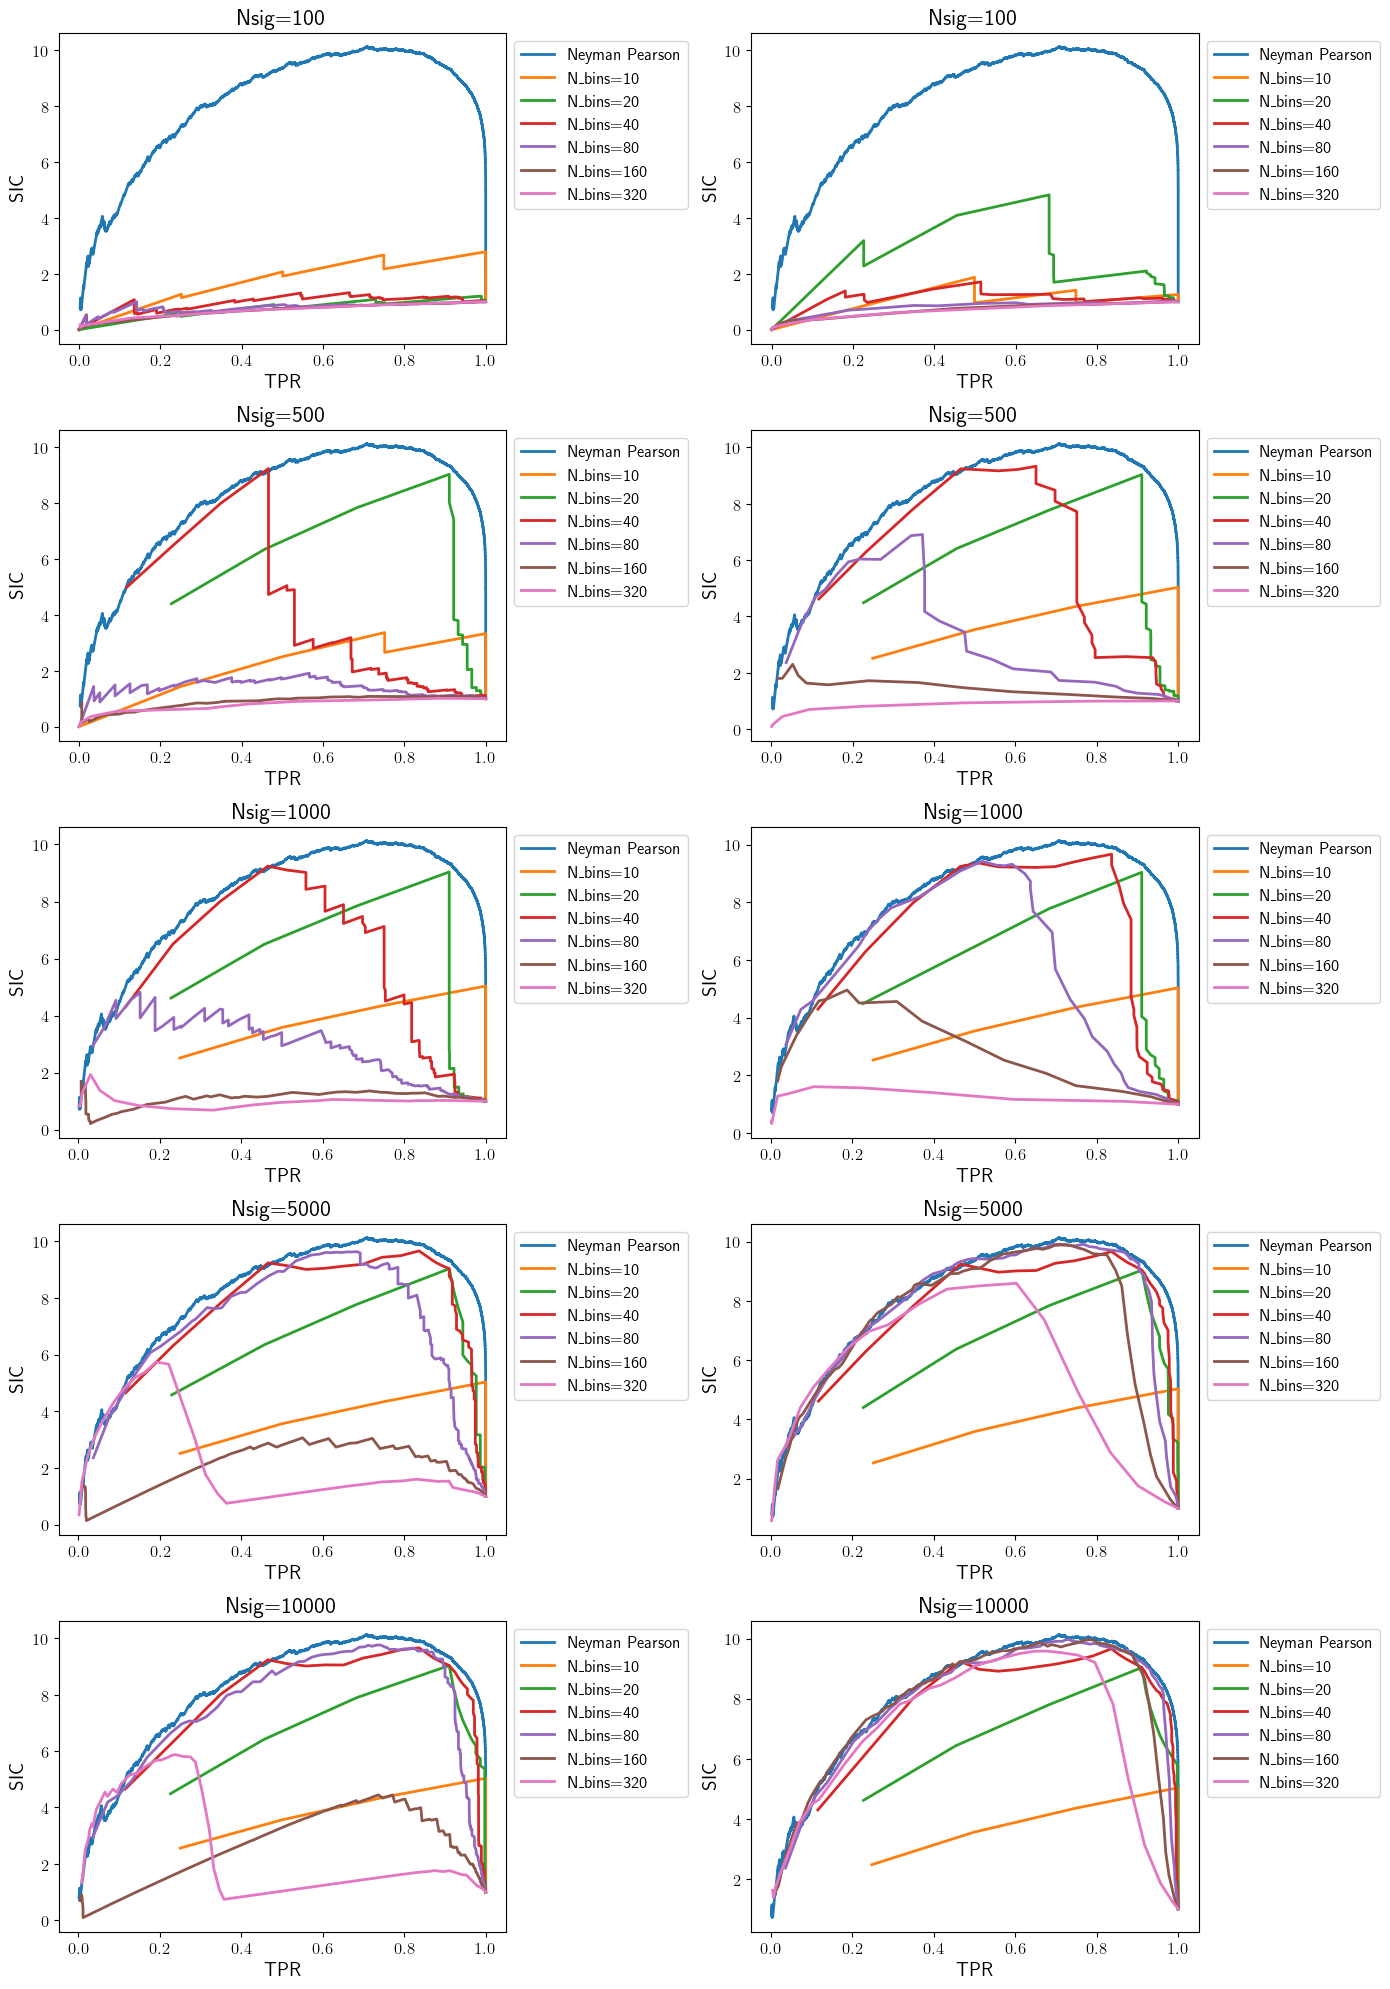

In [8]:
N_sig = [100, 500, 1000, 5000, 10000]
nbins = [10, 20, 40, 80, 160, 320]
fig, ax = plt.subplots(len(N_sig),2, figsize=(14, 20))
for i, s in enumerate(N_sig): 
    plot_roc(ax[i,0],neyman_pearson(test, bkg, sig), test_labels, "Neyman Pearson")
    plot_roc(ax[i,1],neyman_pearson(test, bkg, sig), test_labels, "Neyman Pearson")
    for j, b in enumerate(nbins):
        plot_roc(ax[i,0],weakly_supervised(100000, s, b, test, bkg, sig), test_labels, "N_bins="+str(b))
        plot_roc(ax[i,1],weakly_supervised_infstats_BT(100000, s, b, test, bkg, sig), test_labels, "N_bins="+str(b))
    ax[i,0].set_xlabel("TPR")
    ax[i,0].set_ylabel("SIC")
    ax[i,0].set_title("Nsig="+str(s))
    ax[i,0].legend(loc="upper left", bbox_to_anchor=(1,1))
    ax[i,1].set_xlabel("TPR")
    ax[i,1].set_ylabel("SIC")
    ax[i,1].set_title("Nsig="+str(s))
    ax[i,1].legend(loc="upper left", bbox_to_anchor=(1,1))
fig.tight_layout()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


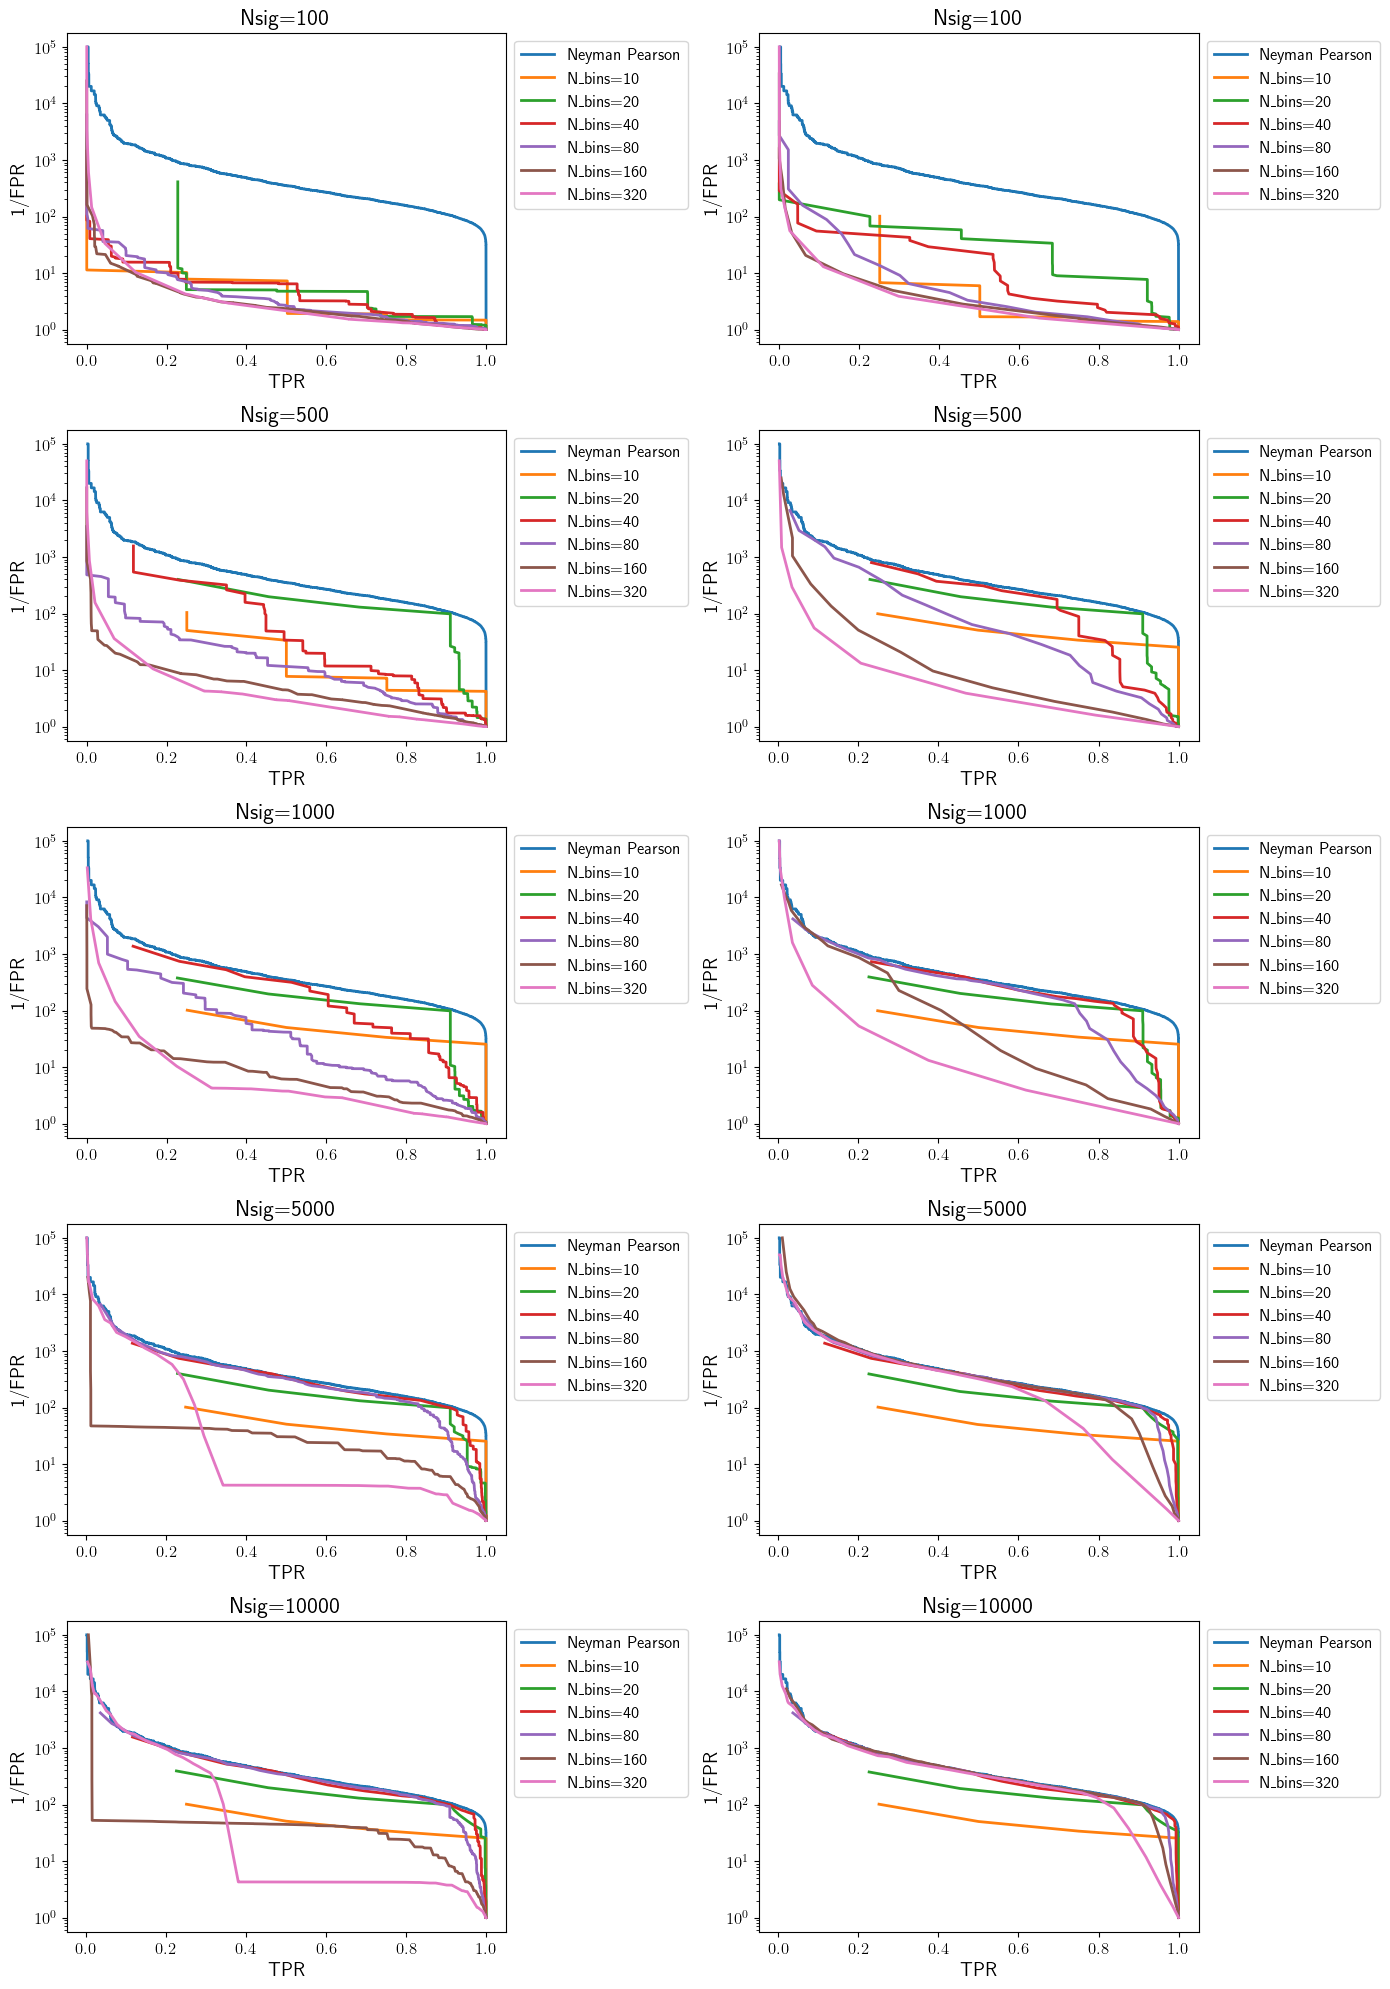

In [17]:
N_sig = [100, 500, 1000, 5000, 10000]
nbins = [10, 20, 40, 80, 160, 320]
fig, ax = plt.subplots(len(N_sig),2, figsize=(14, 20))
for i, s in enumerate(N_sig): 
    plot_roc(ax[i,0],neyman_pearson(test, bkg, sig), test_labels, "Neyman Pearson")
    plot_roc(ax[i,1],neyman_pearson(test, bkg, sig), test_labels, "Neyman Pearson")
    for j, b in enumerate(nbins):
        plot_roc(ax[i,0],weakly_supervised(100000, s, b, test, bkg, sig), test_labels, "N_bins="+str(b))
        plot_roc(ax[i,1],weakly_supervised_infstats_BT(100000, s, b, test, bkg, sig), test_labels, "N_bins="+str(b))
    ax[i,0].set_xlabel("TPR")
    ax[i,0].set_ylabel("1/FPR")
    ax[i,0].set_yscale("log")
    ax[i,0].set_title("Nsig="+str(s))
    ax[i,0].legend(loc="upper left", bbox_to_anchor=(1,1))
    ax[i,1].set_xlabel("TPR")
    ax[i,1].set_ylabel("1/FPR")
    ax[i,1].set_yscale("log")
    ax[i,1].set_title("Nsig="+str(s))
    ax[i,1].legend(loc="upper left", bbox_to_anchor=(1,1))
fig.tight_layout()